In [129]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [130]:
df_bank = pd.read_excel('data/raw_data.xlsx',sheet_name = 'bank_data')
df_bank.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0
3,37202001038750,F,19560524,66,20190709,5000000,0,0
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0


In [131]:
df_cb = pd.read_excel('data/raw_data.xlsx',sheet_name = 'cb_data')
df_cb.head()

,acno,CB,SP,R,PI
0,37201901102569,8,6,3,5
1,37201901114919,1,8,4,2
2,37201901172631,10,9,9,1
3,37202001038750,2,8,2,5
4,37201901092321,7,5,8,3


In [132]:
df_bank.info()  #null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18857 entries, 0 to 18856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   acno       18857 non-null  int64 
 1   sex        18857 non-null  object
 2   brth_dt    18857 non-null  int64 
 3   age        18857 non-null  int64 
 4   exec_dt    18857 non-null  int64 
 5   exec_amt   18857 non-null  int64 
 6   cur_bal    18857 non-null  int64 
 7   ovrd_dvcd  18857 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ MB


In [133]:
age_series = df_bank.age.apply(lambda age: math.floor(age/10)*10)
age_series.name = 'Age_group'

In [134]:
df_bank = pd.concat(
        [df_bank, age_series],
        axis=1)
df_bank

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,Age_group
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,40
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,60
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,50
3,37202001038750,F,19560524,66,20190709,5000000,0,0,60
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,50
...,...,...,...,...,...,...,...,...,...
18852,37202001242757,M,19711104,51,20201031,50000000,23922316,0,50
18853,37201901207056,F,19541104,68,20210308,1500000,0,0,60
18854,37202001275417,F,19540409,68,20200309,30000000,1668160,0,60
18855,37202001049400,M,19950327,27,20200107,5000000,0,0,20


In [135]:
# 단순 카운트
age_group_df = df_bank.groupby("Age_group").size()
age_group_df

Age_group
20    1034
30    3929
40    5911
50    5566
60    2206
70     199
80      12
dtype: int64

In [104]:
df_age = df_bank.groupby("Age_group").agg({"ovrd_dvcd": "mean"})

In [105]:
df_age.ovrd_dvcd = df_age.ovrd_dvcd*100

In [106]:
df_age.index = ['20대','30대','40대','50대','60대','70대','80대']

In [107]:
df_age.ovrd_dvcd = round(df_age.ovrd_dvcd,2)

In [108]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)
%matplotlib inline

[Text(0, 0, '5.42'),
 Text(0, 0, '4.15'),
 Text(0, 0, '4.23'),
 Text(0, 0, '3.4'),
 Text(0, 0, '3.04'),
 Text(0, 0, '3.52'),
 Text(0, 0, '8.33')]

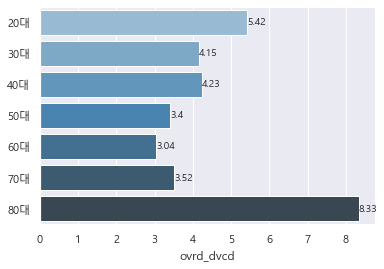

In [115]:
#f, ax = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

ax = sns.barplot(y=df_age.index, x ='ovrd_dvcd',
                data = df_age, palette = 'Blues_d'
                )
ax.bar_label(ax.containers[0])

In [75]:
for index, row in 

Int64Index([20, 30, 40, 50, 60, 70, 80], dtype='int64', name='Age_group')